# drug2cell analysis 10/10/2023

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import os
import anndata
import harmonypy as hm

In [2]:
import drug2cell as d2c
import blitzgsea as blitz

In [3]:
sc.settings.set_figure_params(dpi=300,fontsize=15)

In [4]:
adata = sc.read_h5ad('/rds/general/user/snb20/projects/cardiac_single_cell_biology/live/Endothelial_datasets/data_analyzed/sanger_datasets/adult19_all_d2c.h5ad')

/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
bdata = sc.read_h5ad('/rds/general/user/snb20/projects/cardiac_single_cell_biology/live/Endothelial_datasets/data_analyzed/sanger_datasets/adult19_all_d2c_scores.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 134896 × 31402
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ann_d2c', 'ann_d2c_broad', 'int_ext', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'test', 'numbering', 'ln_ABEC', 'ln_caBEC', 'ln_aBEC', 'ln_t

In [7]:
adata.obs.ann_vas_compartment.value_counts()

ec       50808
mural    19901
lec       3855
Name: ann_vas_compartment, dtype: int64

In [7]:
adata.obs.ann_d2c.value_counts()

Epithelial_cells      14138
T_cells_NKs_ILCs      14092
myo_cap_ec            11771
Myeloid_cells         11644
Fibroblasts           11446
art_smc                8987
ven_ec_1               8433
B_cells                7736
cap_pc                 6330
cap_ec                 4129
LEC                    3855
art_ec_2               3698
littoral_cells         3615
ven_ec_2               2697
pul_cap_ec             2684
endometrium_cap_ec     1744
adip_cap_ec            1671
periportal_cap_ec      1505
large_art_smc          1305
pul_ven_ec             1295
Satellite_cells        1276
ven_smc_pc             1245
myometrium_cap_ec      1082
kidney_cap_ec          1060
remodeling_mural       1004
aerocyte_ec             972
art_ec_1                949
pul_art_ec              734
pericentral_cap_ec      725
glomeruli_ec            638
ven_smc                 477
pul_tip_cap_ec          430
spleen_art_ec           404
pul_pc                  343
kidney_art_ec           239
pul_smc             

In [7]:
bdata

AnnData object with n_obs × n_vars = 134896 × 2396
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ann_d2c', 'ann_d2c_broad', 'int_ext', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'test', 'numbering', 'ln_ABEC', 'ln_caBEC', 'ln_aBEC', 'ln_tB

In [ ]:
sc.pl.umap(adata, color = 'ann_compartment')

In [36]:
sc.tl.rank_genes_groups(adata.uns['drug2cell'], method="wilcoxon", groupby="ann_d2c_broad", pts = True)
#sc.pl.rank_genes_groups_dotplot(adata.uns['drug2cell'], swap_axes=True, dendrogram=False, n_genes=5)

In [38]:
df = sc.get.rank_genes_groups_df(adata.uns['drug2cell'], group = None)

In [39]:
df

group                                            names  \
0               B_cells                        CHEMBL2108041|OCRELIZUMAB   
1               B_cells  CHEMBL2108667|YTTRIUM Y 90 IBRITUMOMAB TIUXETAN   
2               B_cells                          CHEMBL1201576|RITUXIMAB   
3               B_cells                         CHEMBL1201836|OFATUMUMAB   
4               B_cells                        CHEMBL1201604|TOSITUMOMAB   
...                 ...                                              ...   
21559  Epithelial_cells                        CHEMBL1201607|NATALIZUMAB   
21560  Epithelial_cells                      CHEMBL1567|SUNITINIB MALATE   
21561  Epithelial_cells                           CHEMBL477772|PAZOPANIB   
21562  Epithelial_cells            CHEMBL1201733|PAZOPANIB HYDROCHLORIDE   
21563  Epithelial_cells                        CHEMBL1983268|ENTRECTINIB   

           scores  logfoldchanges  pvals  pvals_adj  pct_nz_group  \
0      107.926987        9.637529    0.0        0.0      0.731420   
1      107.926987        9.637529    0.0        0.0      0.731420   
2      107.926987        9.637529    0.0        0.0      0.731420   
3      107.926987        9.637529    0.0        0.0      0.731420   
4      107.926987        9.637529    0.0        0.0      0.731420   
...           ...             ...    ...        ...           ...   
21559 -108.527397       -2.136509    0.0        0.0      0.335125   
21560 -114.306824       -5.083058    0.0        0.0      0.050927   
21561 -121.190544       -1.675867    0.0        0.0      0.694299   
21562 -122.283051       -3.175197    0.0        0.0      0.262060   
21563 -124.408150       -1.291262    0.0        0.0      0.876715   

       pct_nz_reference  
0              0.004188  
1              0.004188  
2              0.004188  
3              0.004188  
4              0.004188  
...                 ...  
21559          0.744516  
21560          0.613898  
21561          0.897622  
21562          0.730705  
21563          0.964599  

[21564 rows x 8 columns]

In [40]:
df.to_csv("d2c_all_cells_SNB.csv")

In [49]:
marker = {
    'EC': ["CHEMBL2109624|CAPLACIZUMAB","CHEMBL2105704|LENVATINIB MESYLATE","CHEMBL3707247|OZANIMOD","CHEMBL2336071|SIPONIMOD","CHEMBL4298150|SIPONIMOD FUMARATE","CHEMBL314854|FINGOLIMOD","CHEMBL1096146|PONESIMOD","CHEMBL3707246|OZANIMOD HYDROCHLORIDE","CHEMBL2109065|DROTRECOGIN ALFA (ACTIVATED)","CHEMBL2103868|CABOZANTINIB S-MALATE","CHEMBL1275|PERGOLIDE MESYLATE","CHEMBL815|DINOPROST","CHEMBL1743062|RAMUCIRUMAB","CHEMBL1201668|NESIRITIDE","CHEMBL2107857|METRELEPTIN","CHEMBL1743070|SILTUXIMAB","CHEMBL1346|DARIFENACIN","CHEMBL1711|ISOPROTERENOL HYDROCHLORIDE","CHEMBL499|TIMOLOL","CHEMBL1201167|CARVEDILOL PHOSPHATE"],
    'LEC': []
    'Mural': ["CHEMBL1201556|BECAPLERMIN","CHEMBL6622|ISOSORBIDE DINITRATE","CHEMBL1311|ISOSORBIDE MONONITRATE","CHEMBL4066936|VERICIGUAT","CHEMBL730|NITROGLYCERIN","CHEMBL136478|SODIUM NITROPRUSSIDE","CHEMBL2107834|RIOCIGUAT","CHEMBL1200689|NITRIC OXIDE","CHEMBL3301622|GILTERITINIB","CHEMBL3301603|GILTERITINIB FUMARATE","CHEMBL4297852|CENEGERMIN","CHEMBL3889654|LAROTRECTINIB","CHEMBL3989939|LAROTRECTINIB SULFATE","CHEMBL2311030|ERGOLOID MESYLATES","CHEMBL1200791|OXYMETAZOLINE HYDROCHLORIDE","CHEMBL597|PHENTOLAMINE","CHEMBL1200413|TETRAHYDROZOLINE HYDROCHLORIDE","CHEMBL3559672|RAUWOLFIA SERPENTINA","CHEMBL1201454|ALSEROXYLON","CHEMBL1706|NAPHAZOLINE HYDROCHLORIDE"]
    
}

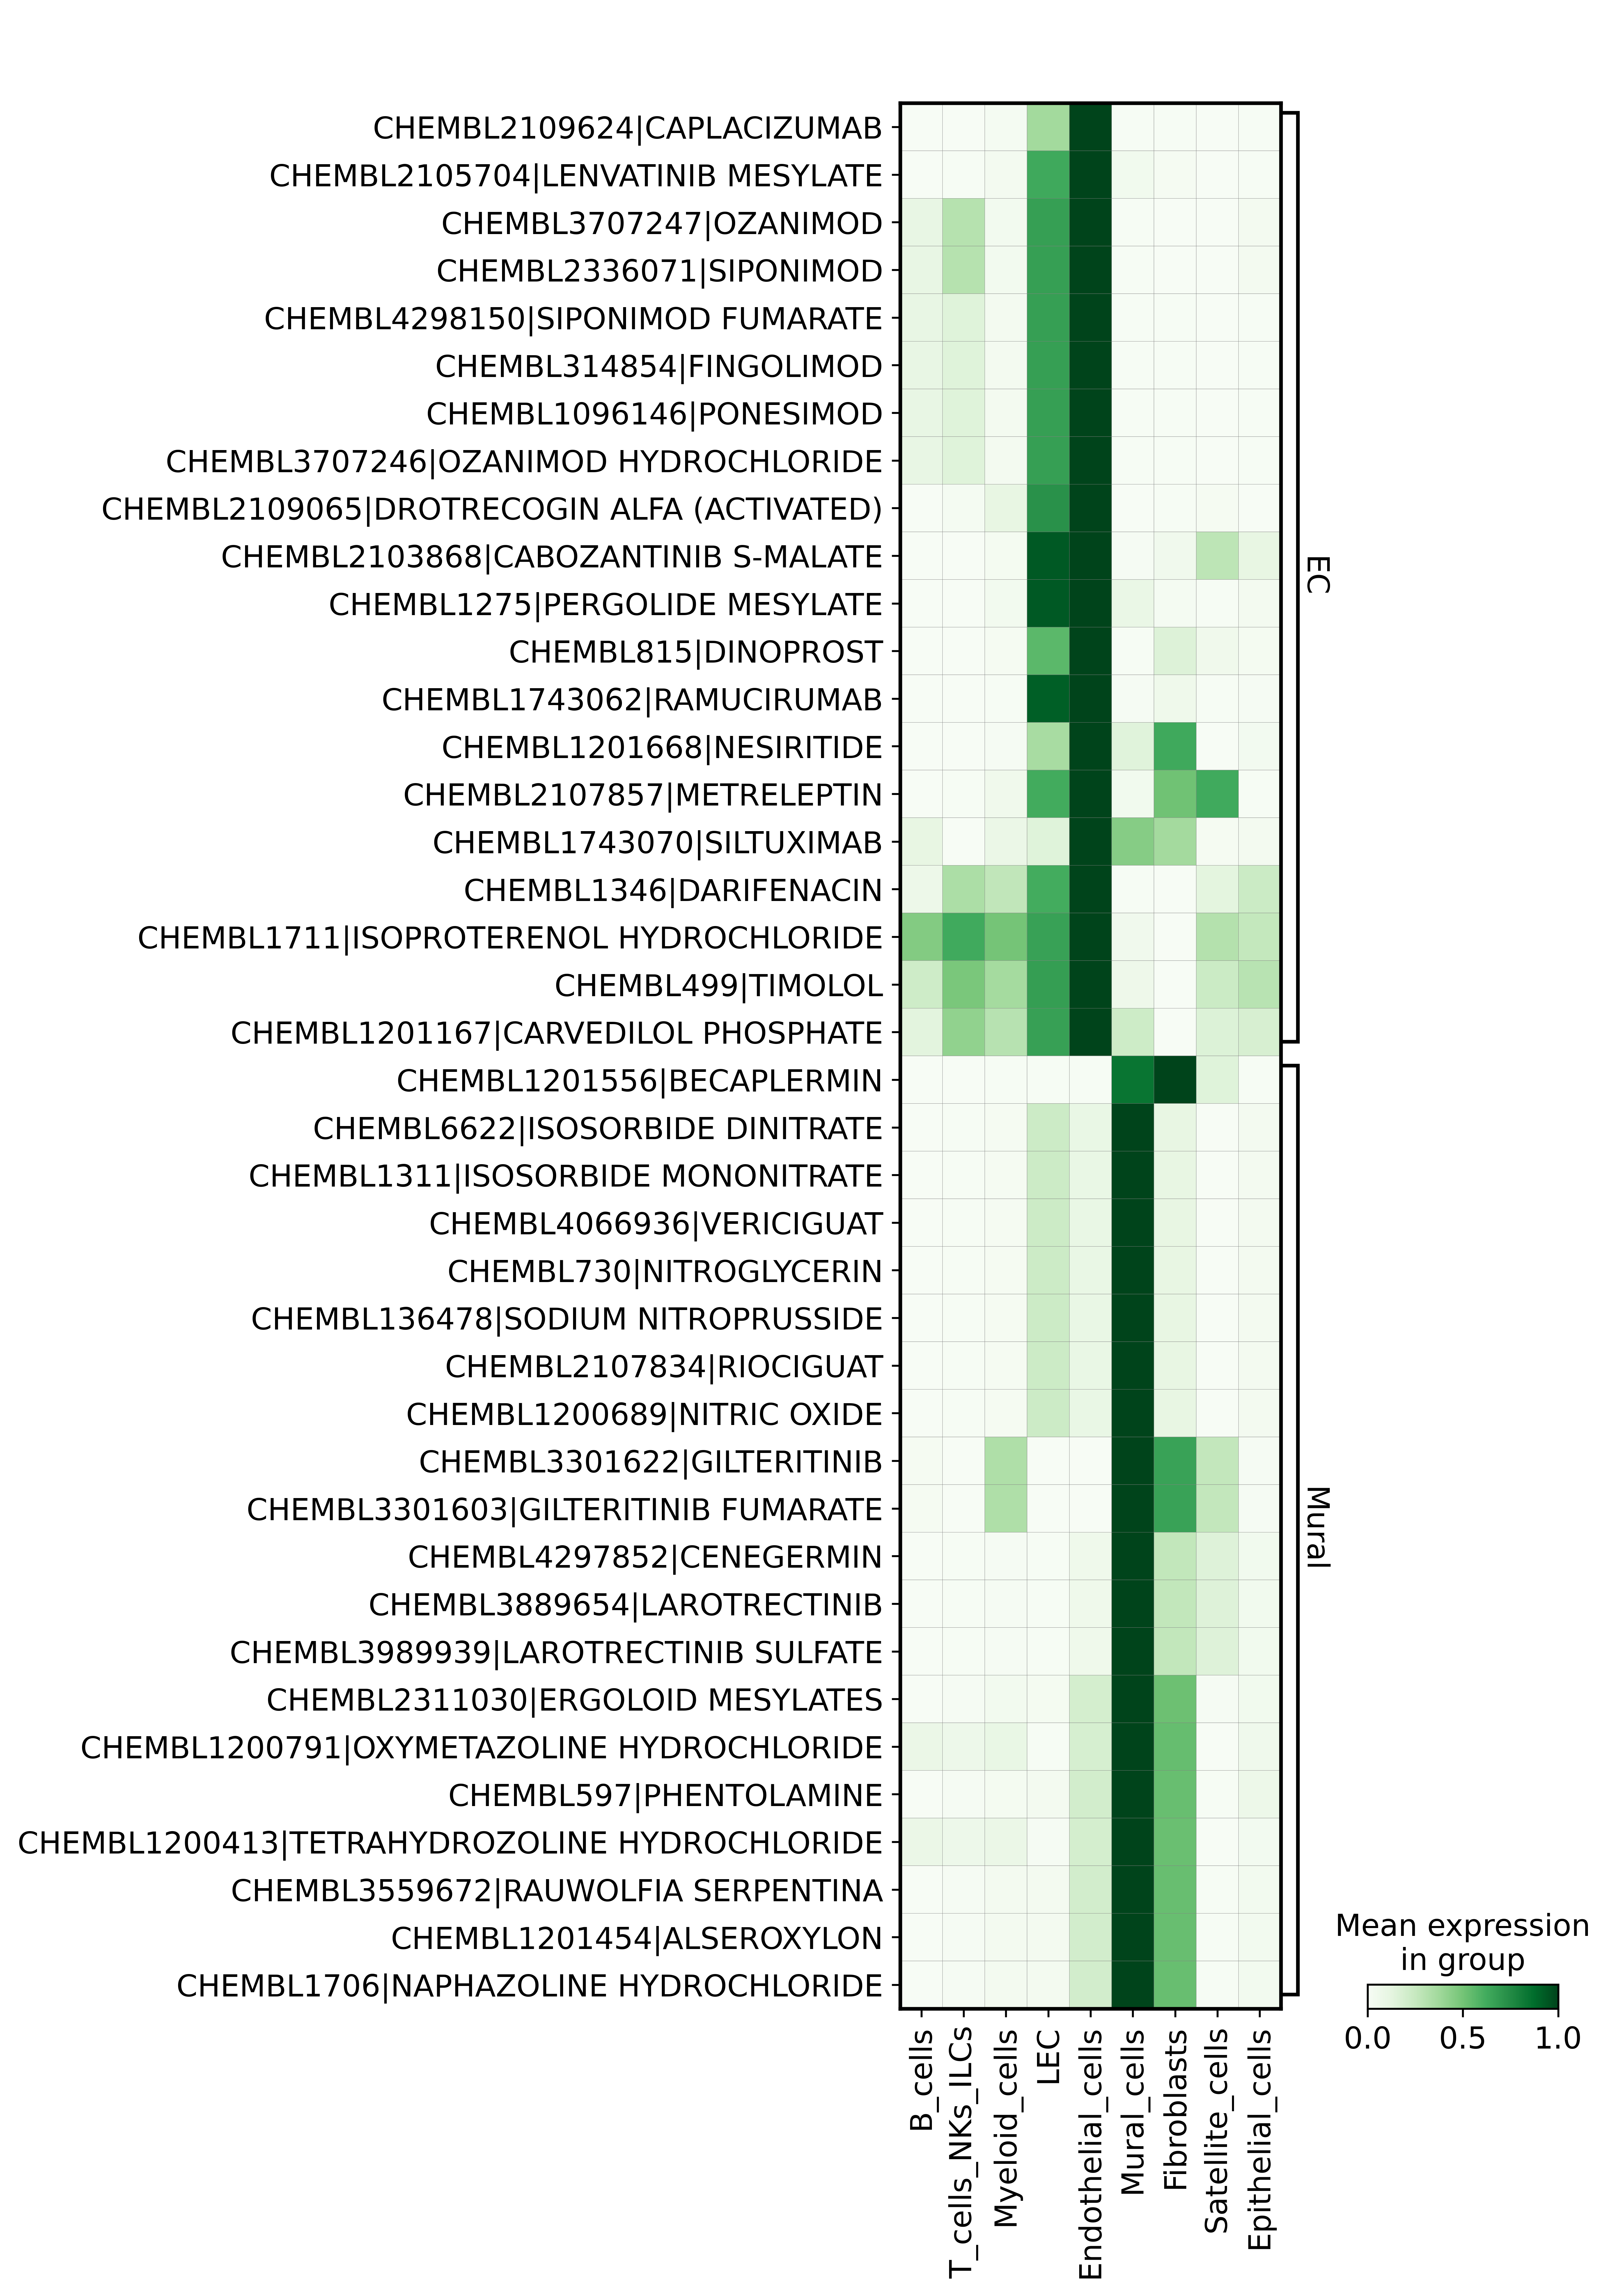

In [55]:
sc.pl.matrixplot(adata.uns['drug2cell'], marker, 'ann_d2c_broad', swap_axes = True, cmap = "Greens", standard_scale = 'var')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata.uns['drug2cell'], swap_axes=False, dendrogram=False, n_genes=20, groups = ["Endothelial_cells", "Mural_cells"])

In [14]:
non_vascular = adata[~adata.obs["ann_d2c_broad"].isin(["Endothelial_cells","Mural_cells"])]

In [18]:
non_vascular.obs.organ_uni.value_counts()

lymph_node         10086
oesophagus          8478
spleen              8305
lung                7460
uterus              4836
muscle              4055
thymus              2803
large_intestine     2802
blood               2535
decidua             2078
bladder             1934
small_intestine     1798
adipose_tissue      1473
heart               1175
liver               1142
kidney              1088
trachea             1086
large_vessels        790
pancreas             263
Name: organ_uni, dtype: int64

In [13]:
adata.obs.ann_d2c_broad.value_counts()

Endothelial_cells    50808
Mural_cells          19901
Epithelial_cells     14138
T_cells_NKs_ILCs     14092
Myeloid_cells        11644
Fibroblasts          11446
B_cells               7736
LEC                   3855
Satellite_cells       1276
Name: ann_d2c_broad, dtype: int64

In [10]:
bdata.obs["ann_d2c_final"] = bdata.obs["ann_d2c"].copy()

In [11]:
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('periportal_cap_ec', 'temp_placeholder')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('pericentral_cap_ec', 'periportal_cap_ec')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('temp_placeholder', 'pericentral_cap_ec')

In [14]:
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('large_art_smc', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('art_smc', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('cap_pc', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('pul_pc', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('pul_smc', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('remodeling_mural', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('ven_smc_pc', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('ven_smc', 'Mural_cells')

In [ ]:
sc.pl.dotplot(bdata, var_names=['CHEMBL1492500|DOTHIEPIN','CHEMBL1118|DESVENLAFAXINE','CHEMBL1743029|IBALIZUMAB','CHEMBL2107874|ROMOSOZUMAB'], groupby = 'ann_d2c_final', swap_axes = True, cmap = 'Purples')

In [14]:
adata

AnnData object with n_obs × n_vars = 134896 × 31402
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ann_d2c', 'ann_d2c_broad', 'int_ext', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'test', 'numbering', 'ln_ABEC', 'ln_caBEC', 'ln_aBEC', 'ln_t

In [15]:
adata.obs.ann_vas_4.value_counts()

09_cap_cont_myo              11771
27_arterial_smc               8987
22_venous_ec                  8433
29_capillary_pc               5967
17_cap_fene_multi             4129
03_arterial_ec_2              3698
21_splenic_venous_sinus       3615
23_ven_activated              2697
13_cap_cont_lung              2684
37_LEC-cap                    1770
11_cap_cont_endometrium       1744
10_cap_cont_adipose           1671
19_cap_sinu_periportal        1505
26_aortic_smc                 1305
07_pul_vein_ec                1295
28_venous_smc_pc              1245
12_cap_cont_myometrium        1082
24_ven_kidney_AVR             1060
30_spiral_art_smc_remodel     1004
15_aerocytes                   972
02_arterial_ec_1               949
06_pul_artery_ec               734
18_cap_sinu_pericentral        725
36_cLEC                        696
16_cap_fene_glomeruli          638
38_bLEC                        547
25_big_vein_smc                477
14_cap_cont_lung_tip           430
41_fLEC             

In [ ]:
sc.tl.rank_genes_groups(adata.uns['drug2cell'], method="wilcoxon", groupby="ann_d2c", groups = ["littoral_cells"], pts = True)

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata.uns['drug2cell'], swap_axes=True, dendrogram=False, n_genes=100)

In [34]:
marker = ["DHCR24","INSR","TPO"]
marker_2 = [""]

In [ ]:
sc.pl.dotplot(adata, marker, "ann_d2c", swap_axes = True)

In [32]:
sc.tl.rank_genes_groups(adata.uns['drug2cell'], method="t-test_overestim_var", groupby="ann_d2c", groups = ["littoral_cells"], pts = True)

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata.uns['drug2cell'], swap_axes=True, dendrogram=False, n_genes=100)

In [ ]:
CHEMBL187709|TRIPARANOL, CHEMBL508102|CARBIMAZOLE, CHEMBL1518|PROPRYLTHIOURACIL

In [ ]:
sc.pl.dotplot(adata.uns['drug2cell'], var_names=['CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL'], groupby = 'ann_d2c', swap_axes = True, cmap = 'RdPu')

In [ ]:
sc.pl.dotplot(bdata, var_names=['CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL'], groupby = 'ann_d2c', swap_axes = True, cmap = 'Reds')

In [ ]:
sc.pl.dotplot(bdata, var_names=['CHEMBL495|ALPROSTADIL'], groupby = 'ann_d2c', swap_axes = True, cmap = 'Reds')

In [10]:
adata

AnnData object with n_obs × n_vars = 134896 × 31402
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ann_d2c', 'ann_d2c_broad', 'int_ext', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'test', 'numbering', 'ln_ABEC', 'ln_caBEC', 'ln_aBEC', 'ln_t

In [6]:
bdata.obs["ann_d2c_final"] = bdata.obs["ann_d2c"].copy()

In [7]:
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('periportal_cap_ec', 'temp_placeholder')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('pericentral_cap_ec', 'periportal_cap_ec')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('temp_placeholder', 'pericentral_cap_ec')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('aorta_ec', 'large_art_ec')

In [ ]:
bdata.obs.ann_d2c_final.value_counts()

In [23]:
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('large_art_smc', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('art_smc', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('cap_pc', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('pul_pc', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('pul_smc', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('remodeling_mural', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('ven_smc_pc', 'Mural_cells')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('ven_smc', 'Mural_cells')

In [11]:
bdata.obs["ann_d2c_final_2"] = bdata.obs["ann_d2c_final"].copy()

In [12]:
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('aerocyte_ec', 'Capillary.EC')
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('pul_cap_ec', 'Capillary.EC')
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('pul_tip_cap_ec', 'Capillary.EC')
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('periportal_cap_ec', 'Capillary.EC')
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('pericentral_cap_ec', 'Capillary.EC')
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('kidney_cap_ec', 'Capillary.EC')
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('glomeruli_ec', 'Capillary.EC')
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('endometrium_cap_ec', 'Capillary.EC')
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('myometrium_cap_ec', 'Capillary.EC')
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('cap_ec', 'Capillary.EC')
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('myo_cap_ec', 'Capillary.EC')
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('adip_cap_ec', 'Capillary.EC')

In [13]:
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('aorta_ec', 'large_art_ec')
bdata.obs['ann_d2c_final_2'] = bdata.obs['ann_d2c_final_2'].replace('littoral_cells', 'Littoral.EC')

In [ ]:
sc.pl.matrixplot(bdata, var_names=['CHEMBL1492500|DOTHIEPIN','CHEMBL1118|DESVENLAFAXINE','CHEMBL1743029|IBALIZUMAB','CHEMBL2107874|ROMOSOZUMAB'], groupby = 'ann_d2c_final_2', swap_axes = True, cmap = 'Purples', standard_scale = 'var')

In [7]:
adata

AnnData object with n_obs × n_vars = 134896 × 31402
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ann_d2c', 'ann_d2c_broad', 'int_ext', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'test', 'numbering', 'ln_ABEC', 'ln_caBEC', 'ln_aBEC', 'ln_t

In [ ]:
sc.pl.dotplot(bdata, var_names=['CHEMBL4297734|CRIZANLIZUMAB','CHEMBL3833319|REVEFENACIN','CHEMBL551466|ACLIDINIUM BROMIDE','CHEMBL3545181|TIOTROPIUM BROMIDE','CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL'], groupby = 'ann_d2c', swap_axes = True, cmap = 'Blues')

In [ ]:
sc.pl.matrixplot(bdata, var_names=['CHEMBL4297734|CRIZANLIZUMAB','CHEMBL3833319|REVEFENACIN','CHEMBL551466|ACLIDINIUM BROMIDE','CHEMBL3545181|TIOTROPIUM BROMIDE','CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL'], groupby = 'ann_d2c_final_2', swap_axes = True, cmap = 'Blues', standard_scale = 'var')

In [ ]:
sc.pl.matrixplot(bdata, var_names=['CHEMBL3833319|REVEFENACIN','CHEMBL551466|ACLIDINIUM BROMIDE','CHEMBL3545181|TIOTROPIUM BROMIDE','CHEMBL4297734|CRIZANLIZUMAB','CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL'], groupby = 'ann_d2c_final_2', swap_axes = True, cmap = 'coolwarm')

In [ ]:
sc.pl.dotplot(bdata, var_names=['CHEMBL3833319|REVEFENACIN','CHEMBL551466|ACLIDINIUM BROMIDE','CHEMBL3545181|TIOTROPIUM BROMIDE','CHEMBL4297734|CRIZANLIZUMAB','CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL'], groupby = 'ann_d2c_final_2', swap_axes = True, cmap = 'RdPu')

In [10]:
bdata

AnnData object with n_obs × n_vars = 134896 × 2396
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ann_d2c', 'ann_d2c_broad', 'int_ext', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'test', 'numbering', 'ln_ABEC', 'ln_caBEC', 'ln_aBEC', 'ln_tB

In [46]:
bdata

AnnData object with n_obs × n_vars = 134896 × 2396
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ann_d2c', 'ann_d2c_broad', 'int_ext', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'test', 'numbering', 'ln_ABEC', 'ln_caBEC', 'ln_aBEC', 'ln_tB

In [40]:
bdata.obs.ann_d2c

TTTACTGTCGAGAACG_HCATisStab7619064          Epithelial_cells
CTAGCCTTCTGCGGCA_WSSS8123931                   Myeloid_cells
GTCAAGTAGCAGATAT_TSP10_FAT_MAT_10X_1_1           Fibroblasts
CGGAGAAGTACAAGTA_TSP2_Bladder_NA_10X_1_2             B_cells
GGAACTTAGGTGGGTT_Human_colon_16S8001865        Myeloid_cells
                                                  ...       
TGCGGGTGTCAGCTAT_WSSS8123931                             LEC
AAGGTTCTCTCCGGTT_WSSS8123931                             LEC
CCAATCCAGTGCGTGA_WSSS8123931                             LEC
GATCTAGAGACGACGT_WSSS8123931                             LEC
AGCGTATGTTCGCTAA_WSSS8123931                             LEC
Name: ann_d2c, Length: 134896, dtype: category
Categories (38, object): ['B_cells', 'T_cells_NKs_ILCs', 'Myeloid_cells', 'Fibroblasts', ..., 'pul_smc', 'remodeling_mural', 'ven_smc_pc', 'ven_smc']

In [35]:
bdata.obs.ann_d2c.value_counts()

Epithelial_cells      14138
T_cells_NKs_ILCs      14092
myo_cap_ec            11771
Myeloid_cells         11644
Fibroblasts           11446
art_smc                8987
ven_ec_1               8433
B_cells                7736
cap_pc                 6330
cap_ec                 4129
LEC                    3855
art_ec_2               3698
littoral_cells         3615
ven_ec_2               2697
pul_cap_ec             2684
endometrium_cap_ec     1744
adip_cap_ec            1671
periportal_cap_ec      1505
large_art_smc          1305
pul_ven_ec             1295
Satellite_cells        1276
ven_smc_pc             1245
myometrium_cap_ec      1082
kidney_cap_ec          1060
remodeling_mural       1004
aerocyte_ec             972
art_ec_1                949
pul_art_ec              734
pericentral_cap_ec      725
glomeruli_ec            638
ven_smc                 477
pul_tip_cap_ec          430
spleen_art_ec           404
pul_pc                  343
kidney_art_ec           239
pul_smc             

In [31]:
adata

AnnData object with n_obs × n_vars = 134896 × 31402
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ann_d2c', 'ann_d2c_broad', 'int_ext', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'test', 'numbering', 'ln_ABEC', 'ln_caBEC', 'ln_aBEC', 'ln_t

In [ ]:
sc.pl.matrixplot(bdata, var_names=['CHEMBL4297734|CRIZANLIZUMAB','CHEMBL3833319|REVEFENACIN','CHEMBL551466|ACLIDINIUM BROMIDE','CHEMBL3545181|TIOTROPIUM BROMIDE','CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL','CHEMBL1492500|DOTHIEPIN','CHEMBL1118|DESVENLAFAXINE','CHEMBL1743029|IBALIZUMAB','CHEMBL2107874|ROMOSOZUMAB'], groupby = 'ann_d2c_final', swap_axes = True, cmap = 'Blues', standard_scale = 'var')

In [12]:
sc.pl.dotplot(bdata, var_names=['CHEMBL4297734|CRIZANLIZUMAB','CHEMBL94081|ALCLOFENAC','CHEMBL139|DICLOFENAC','CHEMBL6|INDOMETHACIN','CHEMBL3833319|REVEFENACIN','CHEMBL551466|ACLIDINIUM BROMIDE','CHEMBL3545181|TIOTROPIUM BROMIDE','CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL','CHEMBL13209|NITRAZEPAM','CHEMBL1453317|DIETHYLTOLUAMIDE','CHEMBL1492500|DOTHIEPIN','CHEMBL1118|DESVENLAFAXINE','CHEMBL75753|XAMOTEROL','CHEMBL781|MAZINDOL','CHEMBL1743029|IBALIZUMAB','CHEMBL2107874|ROMOSOZUMAB','CHEMBL476|DACARBAZINE','CHEMBL305906|CETYLPYRIDINIUM','CHEMBL1200692|OLMESARTAN MEDOXOMIL','CHEMBL843|ROSIGLITAZONE MALEATE', 'CHEMBL1098|BUPIVACAINE','CHEMBL2105743|OLODATEROL HYDROCHLORIDE','CHEMBL1513|IRBESARTAN','CHEMBL1680|OCTREOTIDE', 'CHEMBL190461|CANNABIDIOL','CHEMBL2105682|EDOXABAN TOSYLATE'], groupby = 'ann_d2c_final', swap_axes = True, cmap = 'RdPu', standard_scale = 'var')

In [7]:
bdata.obs["ann_d2c_final"] = bdata.obs["ann_d2c"].copy()

In [8]:
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('periportal_cap_ec', 'temp_placeholder')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('pericentral_cap_ec', 'periportal_cap_ec')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('temp_placeholder', 'pericentral_cap_ec')


In [9]:
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('aorta_ec', 'large_art_ec')
bdata.obs['ann_d2c_final'] = bdata.obs['ann_d2c_final'].replace('ven_smc_pc', 'smc_pc_intermediate')

In [6]:
bdata

AnnData object with n_obs × n_vars = 134896 × 2396
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'sample', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ann_d2c', 'ann_d2c_broad', 'int_ext', 'uni_index', 'subsample', 'donor_organ', 'donor_location', 'test', 'numbering', 'ln_ABEC', 'ln_caBEC', 'ln_aBEC', 'ln_tB

In [ ]:
sc.pl.matrixplot(bdata, var_names=['CHEMBL4297734|CRIZANLIZUMAB','CHEMBL94081|ALCLOFENAC','CHEMBL139|DICLOFENAC','CHEMBL6|INDOMETHACIN','CHEMBL3833319|REVEFENACIN','CHEMBL551466|ACLIDINIUM BROMIDE','CHEMBL3545181|TIOTROPIUM BROMIDE','CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL','CHEMBL13209|NITRAZEPAM','CHEMBL1453317|DIETHYLTOLUAMIDE','CHEMBL1492500|DOTHIEPIN','CHEMBL1118|DESVENLAFAXINE','CHEMBL75753|XAMOTEROL','CHEMBL781|MAZINDOL','CHEMBL1743029|IBALIZUMAB','CHEMBL2107874|ROMOSOZUMAB','CHEMBL476|DACARBAZINE','CHEMBL305906|CETYLPYRIDINIUM','CHEMBL1200692|OLMESARTAN MEDOXOMIL','CHEMBL843|ROSIGLITAZONE MALEATE', 'CHEMBL1098|BUPIVACAINE','CHEMBL2105743|OLODATEROL HYDROCHLORIDE','CHEMBL1513|IRBESARTAN','CHEMBL1680|OCTREOTIDE', 'CHEMBL190461|CANNABIDIOL','CHEMBL2105682|EDOXABAN TOSYLATE'], groupby = 'ann_d2c_final', swap_axes = True, cmap = 'RdPu', standard_scale = 'var')

In [ ]:
sc.pl.dotplot(bdata, var_names=['CHEMBL4297734|CRIZANLIZUMAB','CHEMBL139|DICLOFENAC','CHEMBL6|INDOMETHACIN','CHEMBL3833319|REVEFENACIN','CHEMBL551466|ACLIDINIUM BROMIDE','CHEMBL3545181|TIOTROPIUM BROMIDE','CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL','CHEMBL13209|NITRAZEPAM','CHEMBL1453317|DIETHYLTOLUAMIDE','CHEMBL1492500|DOTHIEPIN','CHEMBL1118|DESVENLAFAXINE','CHEMBL75753|XAMOTEROL','CHEMBL781|MAZINDOL','CHEMBL1743029|IBALIZUMAB','CHEMBL2107874|ROMOSOZUMAB','CHEMBL476|DACARBAZINE','CHEMBL305906|CETYLPYRIDINIUM','CHEMBL1200692|OLMESARTAN MEDOXOMIL','CHEMBL843|ROSIGLITAZONE MALEATE', 'CHEMBL1098|BUPIVACAINE','CHEMBL2105743|OLODATEROL HYDROCHLORIDE','CHEMBL1513|IRBESARTAN','CHEMBL1680|OCTREOTIDE', 'CHEMBL190461|CANNABIDIOL','CHEMBL2105682|EDOXABAN TOSYLATE'], groupby = 'ann_d2c_final', swap_axes = True, cmap = 'RdPu', standard_scale = 'var')

In [11]:
sc.pl.dotplot(bdata, var_names=['CHEMBL4297734|CRIZANLIZUMAB','CHEMBL139|DICLOFENAC','CHEMBL6|INDOMETHACIN','CHEMBL3833319|REVEFENACIN','CHEMBL551466|ACLIDINIUM BROMIDE','CHEMBL3545181|TIOTROPIUM BROMIDE','CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL','CHEMBL13209|NITRAZEPAM','CHEMBL1453317|DIETHYLTOLUAMIDE','CHEMBL1492500|DOTHIEPIN','CHEMBL1118|DESVENLAFAXINE','CHEMBL781|MAZINDOL','CHEMBL75753|XAMOTEROL','CHEMBL1743029|IBALIZUMAB','CHEMBL2107874|ROMOSOZUMAB','CHEMBL476|DACARBAZINE','CHEMBL305906|CETYLPYRIDINIUM','CHEMBL843|ROSIGLITAZONE MALEATE', 'CHEMBL1098|BUPIVACAINE','CHEMBL2105743|OLODATEROL HYDROCHLORIDE'], groupby = 'ann_d2c_final', swap_axes = False, cmap = 'RdPu', standard_scale = 'var')

In [ ]:
sc.pl.dotplot(bdata, var_names=['CHEMBL4297734|CRIZANLIZUMAB','CHEMBL139|DICLOFENAC','CHEMBL6|INDOMETHACIN','CHEMBL3833319|REVEFENACIN','CHEMBL551466|ACLIDINIUM BROMIDE','CHEMBL3545181|TIOTROPIUM BROMIDE','CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL','CHEMBL13209|NITRAZEPAM','CHEMBL1453317|DIETHYLTOLUAMIDE','CHEMBL1492500|DOTHIEPIN','CHEMBL781|MAZINDOL','CHEMBL75753|XAMOTEROL','CHEMBL1743029|IBALIZUMAB','CHEMBL2107874|ROMOSOZUMAB','CHEMBL476|DACARBAZINE','CHEMBL305906|CETYLPYRIDINIUM','CHEMBL843|ROSIGLITAZONE MALEATE', 'CHEMBL2105743|OLODATEROL HYDROCHLORIDE'], groupby = 'ann_d2c_final', swap_axes = True, cmap = 'RdPu', standard_scale = 'var')

In [ ]:
sc.pl.dotplot(bdata, var_names=['CHEMBL4297734|CRIZANLIZUMAB','CHEMBL139|DICLOFENAC','CHEMBL6|INDOMETHACIN','CHEMBL3833319|REVEFENACIN','CHEMBL551466|ACLIDINIUM BROMIDE','CHEMBL3545181|TIOTROPIUM BROMIDE','CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL','CHEMBL13209|NITRAZEPAM','CHEMBL1453317|DIETHYLTOLUAMIDE','CHEMBL1492500|DOTHIEPIN','CHEMBL1118|DESVENLAFAXINE','CHEMBL75753|XAMOTEROL','CHEMBL781|MAZINDOL','CHEMBL1743029|IBALIZUMAB','CHEMBL2107874|ROMOSOZUMAB','CHEMBL476|DACARBAZINE','CHEMBL305906|CETYLPYRIDINIUM','CHEMBL1200692|OLMESARTAN MEDOXOMIL','CHEMBL843|ROSIGLITAZONE MALEATE', 'CHEMBL1098|BUPIVACAINE','CHEMBL2105743|OLODATEROL HYDROCHLORIDE','CHEMBL1513|IRBESARTAN','CHEMBL1680|OCTREOTIDE', 'CHEMBL190461|CANNABIDIOL','CHEMBL2105682|EDOXABAN TOSYLATE'], groupby = 'ann_d2c_final', swap_axes = False, cmap = 'RdPu', standard_scale =None)

In [18]:
bdata.obs.ann_d2c_final.value_counts()

Epithelial_cells      14138
T_cells_NKs_ILCs      14092
myo_cap_ec            11771
Myeloid_cells         11644
Fibroblasts           11446
art_smc                8987
ven_ec_1               8433
B_cells                7736
cap_pc                 6330
cap_ec                 4129
LEC                    3855
art_ec_2               3698
littoral_cells         3615
ven_ec_2               2697
pul_cap_ec             2684
endometrium_cap_ec     1744
adip_cap_ec            1671
pericentral_cap_ec     1505
large_art_smc          1305
pul_ven_ec             1295
Satellite_cells        1276
ven_smc_pc             1245
myometrium_cap_ec      1082
kidney_cap_ec          1060
remodeling_mural       1004
aerocyte_ec             972
art_ec_1                949
pul_art_ec              734
periportal_cap_ec       725
glomeruli_ec            638
ven_smc                 477
pul_tip_cap_ec          430
spleen_art_ec           404
pul_pc                  343
kidney_art_ec           239
pul_smc             

In [ ]:
sc.pl.matrixplot(bdata, var_names=['CHEMBL4297734|CRIZANLIZUMAB','CHEMBL3833319|REVEFENACIN','CHEMBL551466|ACLIDINIUM BROMIDE','CHEMBL3545181|TIOTROPIUM BROMIDE','CHEMBL187709|TRIPARANOL', 'CHEMBL508102|CARBIMAZOLE', 'CHEMBL1518|PROPYLTHIOURACIL','CHEMBL1492500|DOTHIEPIN','CHEMBL1118|DESVENLAFAXINE','CHEMBL1743029|IBALIZUMAB','CHEMBL2107874|ROMOSOZUMAB'], groupby = 'ann_d2c_final', swap_axes = True, cmap = 'Blues', standard_scale = 'var')